In [1]:
import numpy as np
import matplotlib.pyplot as plt

from network_components import *
from network_logic import Model
from sample_data import *

import ipywidgets

In [2]:
def get_grid_predictions(x_min, x_max, nx, ny, y_min, y_max, model):
    x = np.linspace(x_min, x_max, nx)
    y = np.linspace(y_min, y_max, ny)
    xx, yy = np.meshgrid(x, y)
    points = np.vstack((
        xx.flatten(),
        yy.flatten()
    ))

    def softmax(Z):
        Z_exp = np.exp(Z)
        return Z_exp / np.sum(Z_exp, axis=0)
    preds = softmax(model(points))[0].reshape(ny, nx)
    
    return x, y, preds

In [3]:
# Get sample data
X, Y = gaussian()
# Transform Y into probabilities
Y_ = np.zeros((2, Y.shape[0]))
Y_[0, Y] = 1
Y_[1, 1-Y] = 0

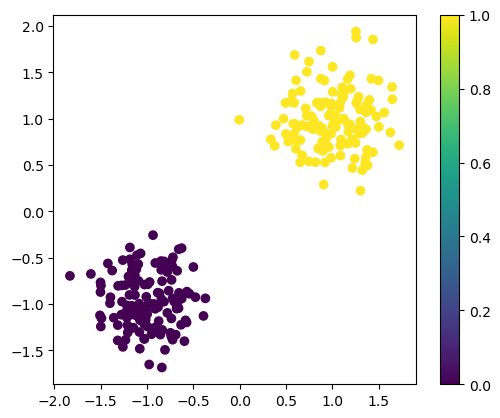

In [4]:
plt.scatter(X[0], X[1], c=Y)
plt.gca().set_aspect('equal')
plt.colorbar()
plt.show()

In [5]:
linear1 = LinearLayer(in_features=2, out_features=2)
smax_ce_loss = SoftmaxCrossEntropyLoss()
model = Model(
    linear1,
    loss_func=smax_ce_loss
)

In [11]:
grid_predictions = []
for i in range(10):
    loss, acc = model.fit(X, Y_)
    print(f'epoch: {i}, loss = {loss:.3f}, accuracy = {acc:.3f}')
    grid_pred = get_grid_predictions(x_min=-2.5, x_max=2.5, nx=50, y_min=-2.5, y_max=2.5, ny=50, model=model)
    grid_predictions.append(grid_pred)

epoch: 0, loss = 0.006, accuracy = 0.496
epoch: 1, loss = 0.006, accuracy = 0.496
epoch: 2, loss = 0.006, accuracy = 0.496
epoch: 3, loss = 0.006, accuracy = 0.496
epoch: 4, loss = 0.006, accuracy = 0.496
epoch: 5, loss = 0.006, accuracy = 0.496
epoch: 6, loss = 0.006, accuracy = 0.496
epoch: 7, loss = 0.006, accuracy = 0.496
epoch: 8, loss = 0.006, accuracy = 0.496
epoch: 9, loss = 0.006, accuracy = 0.496


In [12]:
def plot_grid_prediction(grid_prediction, X, Y):
    x, y, preds = grid_prediction

    cmap = 'RdYlBu'
    plt.contourf(x, y, preds, levels=50, cmap=cmap)
    plt.contour(x, y, preds, levels=[.5], linewidths=.5)
    plt.scatter(X[0], X[1], c=Y, edgecolors='grey', cmap=cmap)
    plt.colorbar()
    plt.show()


In [13]:
def plot_grid_prediction_wrapper(x):
    plot_grid_prediction(grid_predictions[x], X, Y)

x = ipywidgets.IntSlider(
    value=0,
    min=0,
    max=len(grid_predictions)-1,
    description='Epoch:',
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

ipywidgets.interact(plot_grid_prediction_wrapper, x=x)
print()

interactive(children=(IntSlider(value=0, continuous_update=False, description='Epoch:', max=9), Output()), _do…